In [1]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

# Simulation

In [2]:
coin = make_array('head', 'tail')
coin

array(['head', 'tail'],
      dtype='<U4')

In [3]:
# let's simulate one coin toss
np.random.choice(coin)
# if we pass in only ONE argument in np.random.choice, by default we will only randomly select ONCE

'head'

In [4]:
np.random.choice(coin, 2)
# what returns is an array of my 2 random selections from coin array
# we are simulating TWO coin tosses

array(['tail', 'tail'],
      dtype='<U4')

In [5]:
# we can now simulate 10 coin tosses
np.random.choice(coin, 10)

array(['tail', 'head', 'head', 'head', 'head', 'head', 'head', 'head',
       'head', 'tail'],
      dtype='<U4')

In [6]:
(np.random.choice(coin, 2)=='head')
# the first time i flipped my coin, i got tail
# the second time i got head
# i got one heads in my coin toss


array([False, False], dtype=bool)

In [7]:
sum(np.random.choice(coin, 2)=='head')
# np.random.choice(coin, 2), we are simulating 2 coin tosses
# np.random.choice(coin, 2)=='head', we are counting the number of times 'head' appears
# what returns is an array of boolean values
# sum([True, True]) # sum counts the number of Trues
# sum([1    ,  1])
# 1 + 1 = 2

1

In [8]:
np.random.choice(coin, 100)

array(['head', 'tail', 'head', 'head', 'head', 'tail', 'head', 'tail',
       'tail', 'head', 'tail', 'head', 'tail', 'head', 'tail', 'tail',
       'tail', 'tail', 'head', 'head', 'tail', 'tail', 'tail', 'head',
       'tail', 'tail', 'head', 'tail', 'head', 'tail', 'tail', 'head',
       'head', 'tail', 'tail', 'tail', 'head', 'head', 'head', 'tail',
       'tail', 'head', 'tail', 'tail', 'tail', 'head', 'tail', 'tail',
       'head', 'tail', 'tail', 'head', 'tail', 'tail', 'head', 'tail',
       'head', 'head', 'head', 'head', 'head', 'head', 'tail', 'tail',
       'tail', 'tail', 'head', 'tail', 'tail', 'head', 'head', 'head',
       'head', 'head', 'tail', 'tail', 'head', 'tail', 'tail', 'head',
       'head', 'head', 'tail', 'tail', 'tail', 'tail', 'head', 'tail',
       'tail', 'head', 'head', 'head', 'tail', 'head', 'tail', 'tail',
       'tail', 'tail', 'tail', 'head'],
      dtype='<U4')

---
back to slides

---
# Chance

## Probability Question
- I have three cards: ace of hearts, king of diamonds, and queen of spades.
- I shuffle them and draw two cards at random without replacement.
- What is the chance that I get the Queen followed by the King?

In [9]:
cards = make_array('ace', 'king', 'queen')
cards

array(['ace', 'king', 'queen'],
      dtype='<U5')

In [10]:
np.random.choice(cards, 2, replace = False)


array(['king', 'queen'],
      dtype='<U5')

In [11]:
# the probabiliyt of me selecting a Queen first, then king
1/3 * 1/2 # use multiplication rule, =  1/6


0.16666666666666666

In [12]:
# the probabiliyt of me selecting a Queen and a king (doesn't matter the order)
# selecting one card at a time
# two possibilities are: queen first, then king 1/3 * 1/2 
# king first, then queen

(1/3 * 1/2 ) + (1/3 * 1/2) # = 1/3


0.3333333333333333

---
back to slides

---

## Another Question
- I have three cards: ace of hearts, king of diamonds, and queen of spades.
- I shuffle them and draw two cards at random without replacement.
- What is the chance that one of the cards I draw is a King and the other is Queen?

--- 
back to slides

---

# Discussion question
A population has 100 people, including Rick and Morty.
We sample two people at random without replacement.

1. P(both Rick and Morty are in the sample)
1. P(neither Rick nor Morty is in the sample)

---
back to slides

---

# The Monty Hall Problem 

In [13]:
doors = make_array('car', 'first goat', 'second goat')
doors

array(['car', 'first goat', 'second goat'],
      dtype='<U11')

In [20]:
def monty_hall():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""

    # randomly chooses an element from our doors array
    # contestant_choice will either be car, first goat, second goat
    contestant_choice = np.random.choice(doors)


    # first scenario: i choose a goat
    if contestant_choice == 'first goat':
        # if (contestant_choice == 'first goat') evaluates to True
        #Python will run lines 14 and 15 
        # exit out of the if branches
        # and go to line 38, and evaluate the return statement of the function
        monty_choice = 'second goat'
        remaining_choice = 'car' # Contestant wins if they switch door
        

    # second scenario: i choose a goat, second goat
    if contestant_choice == 'second goat':
        # if (contestant choice == 'second goat') evaluates to True
        # in other words, if (True):
        # Python will proceed with running lines 25-26, the code indented after the if statement
        # exit out of the if branches
        # evaluate the return statement at the bottom
        monty_choice = 'first goat'
        remaining_choice = 'car' # Contestant wins if they switch door

    # third scenario, i choose a car 
    if contestant_choice == 'car':
        # randomly choose from first goat or second goat list, 
        # this informs which door monty hall will open to reveal a goat

        # contestant will WIN if they choose to stay with first selection
        monty_choice = np.random.choice(['first goat', 'second goat'])
        if monty_choice == 'first goat':
            remaining_choice = 'second goat' # Contestant LOSES if they switch door
        elif monty_choice == 'second goat':
            remaining_choice = 'first goat' # Contestant LOSES if they switch door        
    
        
    return [contestant_choice, monty_choice, remaining_choice]

In [23]:
monty_hall()

['second goat', 'first goat', 'car']

In [24]:
results = Table(['Guess', 'Revealed', 'Remaining'])
results

Guess,Revealed,Remaining


In [28]:
results.append(monty_hall())
# Table.append does not need an assignment statement to save the changes
# here the changes are adding additional rows to our table

Guess,Revealed,Remaining
car,first goat,second goat
second goat,first goat,car
second goat,first goat,car
car,first goat,second goat


In [30]:
results
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())


Guess,Revealed,Remaining
car,first goat,second goat
second goat,first goat,car
second goat,first goat,car
car,first goat,second goat
car,second goat,first goat
second goat,first goat,car
second goat,first goat,car
second goat,first goat,car


In [31]:
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())


Guess,Revealed,Remaining
car,first goat,second goat
second goat,first goat,car
second goat,first goat,car
car,first goat,second goat
car,second goat,first goat
second goat,first goat,car
second goat,first goat,car
second goat,first goat,car
car,first goat,second goat
second goat,first goat,car


In [32]:
# will add 16 more rows of our monty hall simulation
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())
results.append(monty_hall())
# this is a signal that we may be able to do this MORE efficiently
# with a for loop

Guess,Revealed,Remaining
car,first goat,second goat
second goat,first goat,car
second goat,first goat,car
car,first goat,second goat
car,second goat,first goat
second goat,first goat,car
second goat,first goat,car
second goat,first goat,car
car,first goat,second goat
second goat,first goat,car


In [38]:
len(np.arange(10_000))

10000

In [39]:
results = Table(['Guess', 'Revealed', 'Remaining'])
results
for i in np.arange(10_000): # for i (0, 1, 2, ... 9_999) 
    # notice there are 10_000 elements in the array (0, 1, 2, ..., 9_999)
    # i will "traverse" through the array from i = 0, i = 1, ... i = 9_999
    # because we don't use i in any of our calculations within the for loop, body 
    # i acts only as a counter, for how many times we will run the following code:
    results.append(monty_hall())

In [40]:
results.show(3)

Guess,Revealed,Remaining
second goat,first goat,car
first goat,second goat,car
first goat,second goat,car


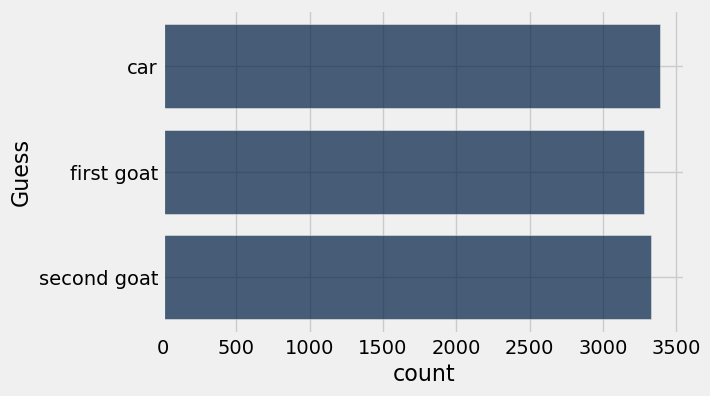

In [42]:
results.group('Guess').barh('Guess')
# probability of us selecting a goat on the first try is 
# using addition rule:
# 1/3 + 1/3 = 2/3

# probability of me selecting a car, if i switch doors is
# probabiliyt of selecting goat first, then car:
# 2/3 * 1/2 = 1/3

# probabiliyt of us selecting a car on the first try is only
# and then staying
# 1/3 
# and if we switch
# 1/3 * 0 = 0

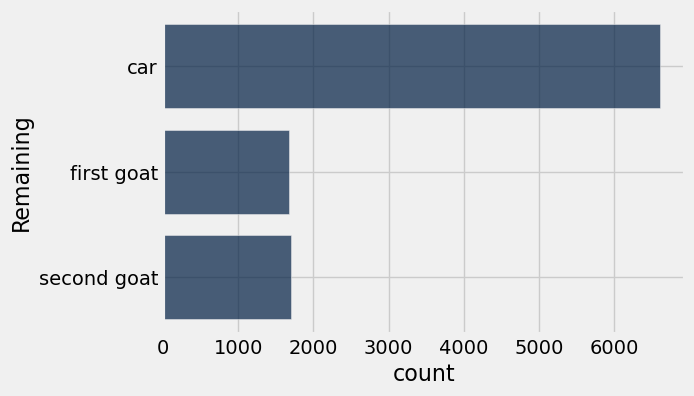

In [47]:
results.group('Remaining').barh('Remaining')
# why should we switch?

In [48]:
6610 / (6610 + 1683 + 1707) # 2/3 prob of my remaining door having a car behind it
6610/ 10_000

0.661

In [49]:
(1683 + 1707) / (6610 + 1683 + 1707)
(1683 + 1707)/10_000 # 1/3 prob of my remaining door having a goat behind it

0.339